<a href="https://colab.research.google.com/github/sethkipsangmutuba/Distributed-Computing-Application/blob/main/Note3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Distributed Computing Paradigms
#Seth Kipsang

## 3.1 Paradigms and Abstraction

**Abstraction:**  
Simplifying complex distributed systems for easier understanding and design.

**Paradigms:**  
Conceptual frameworks for designing distributed applications.

## 3.2 Example Application

- Illustration of a real-world distributed application to demonstrate the application of paradigms  
- Highlights how different paradigms influence design and implementation

## 3.3 Paradigms for Distributed Applications

- **Message Passing:** Direct communication between processes through messages  
- **Client-Server Paradigm:** Centralized servers provide services to multiple clients  
- **Peer-to-Peer Paradigm:** Decentralized network where peers share resources directly  
- **Message System Paradigm:** Applications interact via asynchronous message queues  
- **Remote Procedure Call (RPC) Model:** Enables invoking procedures on remote machines as if local  
- **Distributed Objects Paradigm:** Objects distributed across nodes interact transparently  
- **Object Space:** Shared memory abstraction for object communication  
- **Mobile Agent Paradigm:** Autonomous programs move across nodes to perform tasks  
- **Network Services Paradigm:** Distributed services accessible over the network  
- **Collaborative Applications (Groupware) Paradigm:** Supports teamwork and shared workspaces  

## 3.4 Trade-offs in Distributed Computing

- **Level of Abstraction vs. Overhead:** Higher abstraction simplifies design but may increase computational or communication costs  
- **Scalability:** Ability to efficiently expand system size and user load  
- **Cross-Platform Support:** Ensuring distributed applications work across different operating systems and hardware  

## Summary

- Distributed computing paradigms provide different strategies for designing applications  
- Choice of paradigm depends on requirements like communication, scalability, and platform support  
- Understanding trade-offs is essential for building effective distributed systems


# 3: Distributed Computing Paradigms

## Introduction

Distributed computing is a dynamic and rapidly evolving area of computer science. New technologies and terminologies appear frequently, making it challenging for beginners to navigate. This lecture introduces the main paradigms for distributed applications and provides an overview of the tools and protocols that support them. Later lectures will explore these paradigms and tools in greater detail.

---

## 3.1 Paradigms and Abstraction

### **Abstraction**

**Definition:**  
Abstraction is the process of hiding unnecessary details while focusing on essential features.

**Importance:**
- Simplifies understanding of complex systems  
- Models real-world entities in software without implementing full complexity  

**Examples in Software Engineering:**
- Compilers hide machine language details  
- Java’s Abstract Window Toolkit (AWT) simplifies graphical interface development  

**In Distributed Systems:**  
Tools and paradigms provide various levels of abstraction, making development easier and more efficient.

---

### **Paradigms**

**Definition:**  
A paradigm is a pattern, model, or example that provides a framework for understanding complex systems.

**Purpose in Distributed Computing:**
- Classifies distributed applications by how they abstract underlying complexities  
- Helps identify the design approach suitable for different applications  

---

### **Level of Abstraction in Distributed Paradigms**

Distributed computing paradigms can be classified based on their abstraction level:

| Level of Abstraction | Paradigms |
|----------------------|-----------|
| High | Object space, Collaborative applications (Groupware) |
| Medium-High | Network services, Object request broker, Mobile agents |
| Medium | Remote procedure call (RPC), Remote method invocation (RMI) |
| Low-Medium | Client-server, Peer-to-peer |
| Low | Message passing |

Higher abstraction simplifies development but may hide details, while lower abstraction provides more control over underlying operations.

---

## 3.2 Example Application

### **Application Used:**  
Online auctioning system

### **Scenario:**
- One auction item per session  
- Participants place bids on the item  
- Auctioneer announces the outcome at the end of the session  

### **Purpose:**
- Illustrates how different paradigms can be applied  
- Focuses on the service layer of a three-layer distributed architecture  
- Highlights differences in abstractions, communication, and implementation between paradigms  

---

## Key Points

- Distributed computing paradigms provide structured approaches to building distributed applications.  
- Abstraction is central to managing complexity in distributed systems.  
- Comparing paradigms through a common application (like an auction system) clarifies design trade-offs and advantages.


In [22]:
import random
import time

class AuctionService:
    def __init__(self, item, participants):
        self.item = item
        self.participants = participants
        self.bids = {}

    def receive_bid(self, name, amount):
        self.bids[name] = amount
        print(f"[BID] {name} → ${amount}")

    def run_session(self):
        print(f"\n=== Auction Started: {self.item} ===")

        # Simulate bids coming in
        for p in self.participants:
            bid = random.randint(10, 100)
            self.receive_bid(p, bid)
            time.sleep(0.2)  # simulates distributed delay

        # Announce outcome
        winner = max(self.bids, key=self.bids.get)
        print(f"\n[RESULT] Winner: {winner} with ${self.bids[winner]}")
        print(f"=== Auction Closed ===\n")


# Example usage (simulation)
auction = AuctionService(
    item="Vintage Camera",
    participants=["Alice", "Bob", "Cynthia", "David"]
)

auction.run_session()



=== Auction Started: Vintage Camera ===
[BID] Alice → $83
[BID] Bob → $62
[BID] Cynthia → $97
[BID] David → $50

[RESULT] Winner: Cynthia with $97
=== Auction Closed ===



#3.3 Paradigms for Distributed Applications  
##3.3.1 Message Passing

## Definition
Message passing is the most fundamental paradigm in distributed computing. It allows interprocess communication by exchanging data (messages) between two processes: a sender and a receiver.

## How It Works
- A process sends a message representing a request.  
- The receiving process processes the request and sends back a response message.  
- This response may trigger further requests, forming a chain of messages.

## Core Operations
- **send** – to transmit a message  
- **receive** – to accept a message  
- For connection-oriented communication: **connect** and **disconnect** are also required  

## Abstraction Benefits
- Message passing encapsulates network communication details, similar to how file I/O hides low-level disk operations.  
- Programmers can send and receive messages without handling the underlying network complexity.

## Example Implementation Tool
**Sockets API** (covered in Note 4)
- Logical construct allowing two processes to exchange messages  
- Sender inserts (write) a message into the socket  
- Receiver extracts (read) the message from the socket  

## Illustration

| Process     | Messages                    |
|-------------|-----------------------------|
| Process A   | Sends m1 to Process B       |
| Process B   | Sends m2 to Process A       |
| Process A   | Sends m3 to Process B       |

**Figure 3.2:** This diagram shows the sequential exchange of messages between two processes.


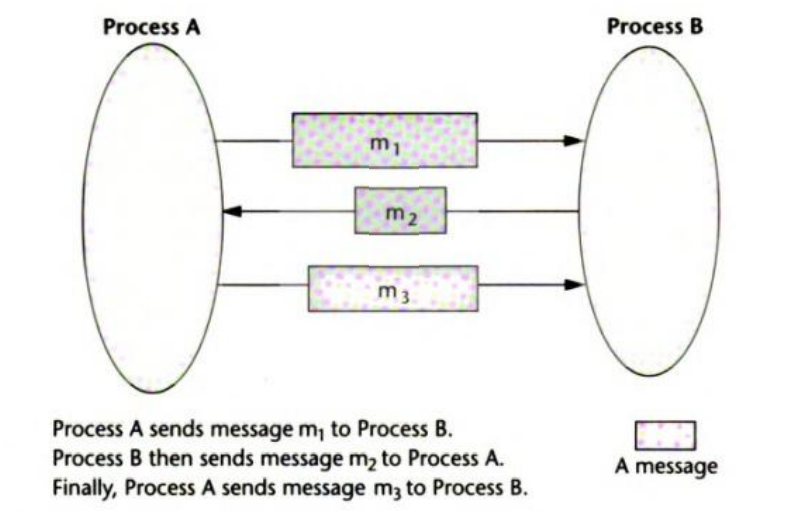

In [23]:
# This simulates Process A and Process B exchanging messages sequentially.

import socket
import threading
import time

# Define host and port
HOST = '127.0.0.1'
PORT = 65432

# Process B: Receiver and Responder
def process_b():
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((HOST, PORT))
        s.listen()
        print("Process B: Waiting for connection...")
        conn, addr = s.accept()
        with conn:
            print(f"Process B: Connected by {addr}")
            for _ in range(3):  # Expecting 3 messages in sequence
                msg = conn.recv(1024).decode()
                if not msg:
                    break
                print(f"Process B received: {msg}")
                response = f"Response to {msg}"
                time.sleep(0.5)  # Simulate processing delay
                conn.sendall(response.encode())
                print(f"Process B sent: {response}")

# Process A: Sender
def process_a():
    time.sleep(1)  # Ensure Process B is ready
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.connect((HOST, PORT))
        messages = ["m1", "m3", "m5"]
        for msg in messages:
            print(f"Process A sending: {msg}")
            s.sendall(msg.encode())
            data = s.recv(1024).decode()
            print(f"Process A received: {data}")
            time.sleep(0.5)  # Simulate delay before next message

# Run both processes using threads to simulate distributed environment
thread_b = threading.Thread(target=process_b)
thread_a = threading.Thread(target=process_a)

thread_b.start()
thread_a.start()

thread_a.join()
thread_b.join()


Process B: Waiting for connection...
Process A sending: m1
Process B: Connected by ('127.0.0.1', 32984)
Process B received: m1
Process B sent: Response to m1
Process A received: Response to m1
Process A sending: m3
Process B received: m3
Process B sent: Response to m3Process A received: Response to m3

Process A sending: m5
Process B received: m5
Process B sent: Response to m5
Process A received: Response to m5


##3.3.2 The Client-Server Paradigm

**Definition:**  
The client-server paradigm is one of the most widely used models for network applications. It assigns asymmetric roles to two interacting processes:

- **Server:** Provides services and waits passively for requests.  
- **Client:** Initiates requests and waits for responses from the server.

*Figure 3.3:* Illustrates the client-server interaction where the client sends a request, and the server responds.

---

### Key Operations

**Server:**
- `listen` – wait for incoming requests  
- `accept` – handle client requests  

**Client:**
- `request` – send a service request  
- `receive` – get the server’s response  

---

### Event Synchronization

Synchronization is simplified because of the asymmetric roles:
- The **server waits for requests**  
- The **client waits for responses**

---

### Examples in the Internet

Common services following this paradigm:
- HTTP  
- FTP  
- DNS  
- finger  
- gopher  

---

### Application Example: Online Auction System

#### Session Control
- **Server role (participant):** Waits for announcements from the auctioneer:
  - Session start  
  - Updates on the current highest bid  
  - Session end  

- **Client role (auctioneer):** Sends requests to announce these events.

#### Bidding
- **Client role (participant):** Sends a new bid to the server.  
- **Server role (auctioneer):** Receives bids and updates the highest bid.

---

### Relevance to Distributed Applications

Many programming facilities inherently use the client-server paradigm.  
APIs such as:
- **Connection-oriented sockets**  
- **Remote Procedure Call (RPC)**  
- **Java RMI**  

explicitly define clients and servers in distributed applications.


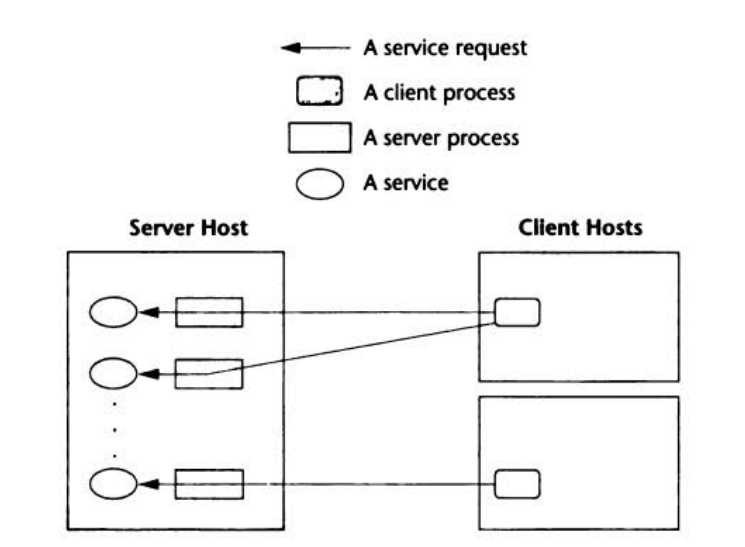

In [24]:
# Example: Online Auction System simulation

import socket
import threading
import time

HOST = '127.0.0.1'
PORT = 65433

# Server: Auctioneer
def auction_server():
    highest_bid = 0
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((HOST, PORT))
        s.listen()
        print("Server (Auctioneer): Waiting for participants...")
        conn, addr = s.accept()
        with conn:
            print(f"Server: Connected to participant {addr}")
            while True:
                data = conn.recv(1024).decode()
                if not data or data.lower() == 'end':
                    print("Server: Auction session ended.")
                    break
                try:
                    bid = float(data)
                    if bid > highest_bid:
                        highest_bid = bid
                        response = f"Highest bid updated: {highest_bid}"
                    else:
                        response = f"Bid too low. Current highest: {highest_bid}"
                except ValueError:
                    response = "Invalid bid. Please enter a number."
                conn.sendall(response.encode())
                print(f"Server: Received bid {data}, responded with '{response}'")

# Client: Participant
def auction_client():
    time.sleep(1)  # Ensure server is ready
    bids = [100, 150, 120, 200]  # Sample bidding sequence
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.connect((HOST, PORT))
        for bid in bids:
            print(f"Client: Sending bid {bid}")
            s.sendall(str(bid).encode())
            response = s.recv(1024).decode()
            print(f"Client: Received response '{response}'")
            time.sleep(0.5)  # Wait before next bid
        s.sendall(b"end")  # Signal end of session

# Run both server and client in threads
server_thread = threading.Thread(target=auction_server)
client_thread = threading.Thread(target=auction_client)

server_thread.start()
client_thread.start()

client_thread.join()
server_thread.join()


Server (Auctioneer): Waiting for participants...
Client: Sending bid 100Server: Connected to participant ('127.0.0.1', 45418)

Server: Received bid 100, responded with 'Highest bid updated: 100.0'
Client: Received response 'Highest bid updated: 100.0'
Client: Sending bid 150
Server: Received bid 150, responded with 'Highest bid updated: 150.0'
Client: Received response 'Highest bid updated: 150.0'
Client: Sending bid 120
Client: Received response 'Bid too low. Current highest: 150.0'
Server: Received bid 120, responded with 'Bid too low. Current highest: 150.0'
Client: Sending bid 200
Server: Received bid 200, responded with 'Highest bid updated: 200.0'
Client: Received response 'Highest bid updated: 200.0'
Server: Auction session ended.


# 3.3.3 The Peer-to-Peer (P2P) Paradigm

## **Definition**
The peer-to-peer (P2P) paradigm assigns *equal* roles to all participating processes, known as **peers**.  
Unlike the client-server model, P2P systems have **no inherent asymmetry**—each peer can both initiate requests and respond to them.

**Figure 3.4:** Two processes exchange requests and responses equally.

---

## **Characteristics**

- All participants have **equivalent capabilities** and responsibilities.
- Communication is **fully decentralized** (no central server required).
- Well-suited for applications such as:
  - Instant messaging  
  - Peer-to-peer file transfers (e.g., Napster)  
  - Video conferencing  
  - Collaborative work  

---

## **Hybrid Models**
Some real-world systems combine both client-server and P2P concepts.

**Example:**  
- **Napster:**  
  - Server handles directory lookup (client-server).  
  - File transfers happen directly between peers (P2P).  

---

## **Implementation**

P2P systems may be built from low-level **message-passing** mechanisms.

For more complex applications, higher-level protocols and platforms exist:

- **JXTA** – P2P resource sharing platform  
- **Jabber/XMPP** – XML-based protocol for instant messaging and presence  

---

## **Application Example: Online Auction System (P2P Implementation)**

In a P2P version of an auction system:

1. A participant contacts the auctioneer directly to register.  
2. The auctioneer contacts all participants to start the session.  
3. Participants:
   - Get the latest bidding status  
   - Submit new bids directly  
4. After the auction:
   - The auctioneer notifies the winner  
   - Other participants can also query for results  

---

## **Key Advantage**
P2P supports **direct communication and collaboration** without relying on a central server, making it ideal for decentralized and interactive distributed applications.

---

## **Real-World Insight**
Modern P2P networking enables **any device** to function as a server.  
This empowers:
- Shared virtual workspaces  
- Real-time collaboration  
- Instant messaging across heterogeneous devices  



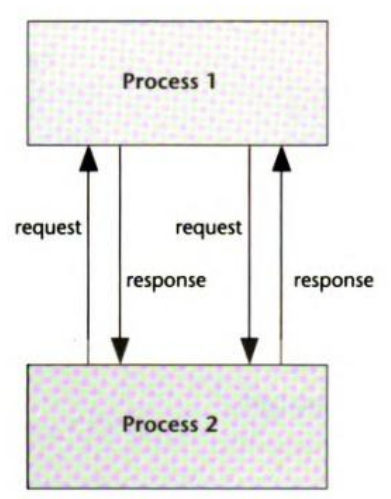

In [25]:
# Example: Simplified P2P Online Auction System

import socket
import threading
import time

# Each peer will act as both server (to receive messages) and client (to send messages)
PEER_PORTS = [65440, 65441]  # Two peers
HOST = '127.0.0.1'

# Function to handle incoming messages for a peer
def peer_server(port, peer_name):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((HOST, port))
        s.listen()
        print(f"{peer_name} listening on port {port}...")
        conn, addr = s.accept()
        with conn:
            while True:
                data = conn.recv(1024).decode()
                if not data or data.lower() == 'end':
                    print(f"{peer_name} session ended by peer.")
                    break
                print(f"{peer_name} received: {data}")
                response = f"{peer_name} acknowledges {data}"
                conn.sendall(response.encode())
                print(f"{peer_name} sent: {response}")

# Function to send messages from a peer to another peer
def peer_client(target_port, messages, peer_name):
    time.sleep(1)  # Ensure target peer server is ready
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.connect((HOST, target_port))
        for msg in messages:
            print(f"{peer_name} sending: {msg}")
            s.sendall(msg.encode())
            response = s.recv(1024).decode()
            print(f"{peer_name} received response: {response}")
            time.sleep(0.5)
        s.sendall(b"end")  # Signal end of session

# Peer A setup
peer_a_thread_server = threading.Thread(target=peer_server, args=(PEER_PORTS[0], "Peer A"))
peer_a_thread_client = threading.Thread(target=peer_client, args=(PEER_PORTS[1], ["Register for Auction", "Bid 100", "Bid 150"], "Peer A"))

# Peer B setup
peer_b_thread_server = threading.Thread(target=peer_server, args=(PEER_PORTS[1], "Peer B"))
peer_b_thread_client = threading.Thread(target=peer_client, args=(PEER_PORTS[0], ["Register for Auction", "Bid 120", "Bid 200"], "Peer B"))

# Start servers first
peer_a_thread_server.start()
peer_b_thread_server.start()

# Start clients to send messages
peer_a_thread_client.start()
peer_b_thread_client.start()

# Join threads
peer_a_thread_client.join()
peer_b_thread_client.join()
peer_a_thread_server.join()
peer_b_thread_server.join()


Peer B listening on port 65441...
Peer A listening on port 65440...
Peer A sending: Register for Auction
Peer B received: Register for Auction
Peer B sending: Register for Auction
Peer B sent: Peer B acknowledges Register for Auction
Peer A received: Register for Auction
Peer A received response: Peer B acknowledges Register for Auction
Peer A sent: Peer A acknowledges Register for Auction
Peer B received response: Peer A acknowledges Register for Auction
Peer A sending: Bid 100Peer B sending: Bid 120

Peer A received: Bid 120
Peer A sent: Peer A acknowledges Bid 120
Peer B received: Bid 100
Peer B received response: Peer A acknowledges Bid 120
Peer B sent: Peer B acknowledges Bid 100
Peer A received response: Peer B acknowledges Bid 100
Peer B sending: Bid 200Peer A sending: Bid 150
Peer B received: Bid 150

Peer B sent: Peer B acknowledges Bid 150
Peer A received response: Peer B acknowledges Bid 150
Peer A received: Bid 200
Peer A sent: Peer A acknowledges Bid 200
Peer B received re

##3.3.4 The Message System Paradigm (Message-Oriented Middleware - MOM)

## Definition:
The Message System Paradigm extends the basic message-passing approach by introducing an intermediary message system that enables asynchronous and decoupled communication between processes.

**Figure 3.5:** Shows a sender, message system, and receiver with message queues.

---

## How it Works:

1. The sender deposits a message in the message system.  
2. The message system stores the message in a queue associated with the receiver.  
3. The receiver retrieves messages from its queue at its own pace.  
4. The sender is free to continue other tasks immediately (non-blocking/asynchronous).

---

## Subtypes of Message Systems:

### **1. Point-to-Point Message Model**

- Each message is delivered from a sender to a specific receiver’s queue.  
- Decouples sending and receiving, unlike basic message-passing.  
- Supports asynchronous operations without additional threads or processes.

**Auction System Example:**  
- Similar to basic message passing, but all messages are routed through the middleware.  
- Sending and receiving processes operate independently.

---

### **2. Publish/Subscribe Message Model**

- Messages are associated with topics or events.  
- Processes subscribe to events of interest and receive messages when events occur.  
- The middleware handles multicasting to all subscribers.

**Auction System Example:**
- Participants subscribe to the “begin-auction” event.  
- Auctioneer publishes a “begin-auction” message to start the session.  
- Participants then subscribe to “end-auction” events.  
- Auctioneer listens for new-bid messages and updates accordingly.  
- Auctioneer publishes the “end-auction” message at the session’s conclusion.

---

## Key Advantages:

- Supports asynchronous communication and group messaging.  
- Decouples senders and receivers for more flexible application design.

---

## Real-World Examples:

- IBM MQ\*Series (Message Queue Services)  
- Microsoft Message Queue (MSMQ)  
- Java Message Service (JMS)

---

The MOM paradigm provides a higher-level abstraction than basic message passing, allowing for asynchronous, decoupled, and group-oriented communication, making it ideal for modern distributed applications.



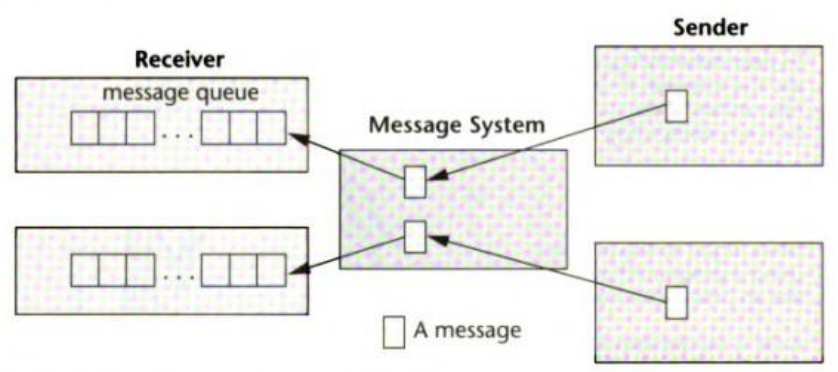

In [26]:
# Example: Online Auction System with Point-to-Point and Publish/Subscribe Models

import threading
import queue
import time

# -------------------------------
# 1. Message System (Middleware)
# -------------------------------
class MessageSystem:
    def __init__(self):
        self.queues = {}  # Each receiver has its own message queue
        self.subscribers = {}  # Topic-based subscription for Pub/Sub

    # Point-to-Point: send to specific receiver
    def send(self, receiver, message):
        if receiver not in self.queues:
            self.queues[receiver] = queue.Queue()
        self.queues[receiver].put(message)
        print(f"MessageSystem: Sent '{message}' to {receiver}")

    # Point-to-Point: receive from own queue
    def receive(self, receiver):
        if receiver in self.queues and not self.queues[receiver].empty():
            return self.queues[receiver].get()
        return None

    # Publish/Subscribe: subscribe to topic
    def subscribe(self, topic, subscriber):
        if topic not in self.subscribers:
            self.subscribers[topic] = []
        self.subscribers[topic].append(subscriber)
        print(f"{subscriber} subscribed to topic '{topic}'")

    # Publish to all subscribers of a topic
    def publish(self, topic, message):
        if topic in self.subscribers:
            for subscriber in self.subscribers[topic]:
                self.send(subscriber, f"[{topic}] {message}")
            print(f"MessageSystem: Published '{message}' to topic '{topic}'")

# -------------------------------
# 2. Auction Participants
# -------------------------------

def auctioneer(ms, name="Auctioneer"):
    # Publish "begin-auction"
    ms.publish("auction", "Begin Auction")
    bids = ["Bid 100", "Bid 150", "Bid 200"]
    for bid in bids:
        time.sleep(0.5)
        ms.send("Auctioneer", bid)  # Point-to-Point: receive new bids
    # Publish "end-auction"
    ms.publish("auction", "End Auction")

def participant(ms, name):
    ms.subscribe("auction", name)  # Subscribe to auction events
    while True:
        msg = ms.receive(name)
        if msg:
            print(f"{name} received: {msg}")
            if "End Auction" in msg:
                break
        time.sleep(0.1)
    # Send final bid to auctioneer (optional point-to-point)
    ms.send("Auctioneer", f"{name}'s final bid 250")

# -------------------------------
# 3. Run the MOM-based Auction
# -------------------------------

ms = MessageSystem()

# Create threads
auctioneer_thread = threading.Thread(target=auctioneer, args=(ms,))
participant_threads = [
    threading.Thread(target=participant, args=(ms, "Participant A")),
    threading.Thread(target=participant, args=(ms, "Participant B"))
]

# Start threads
auctioneer_thread.start()
for t in participant_threads:
    t.start()

# Join threads
auctioneer_thread.join()
for t in participant_threads:
    t.join()

# Final point-to-point check at auctioneer
print("\nAuctioneer receiving final bids:")
while True:
    msg = ms.receive("Auctioneer")
    if msg:
        print(f"Auctioneer received: {msg}")
    else:
        break


Participant A subscribed to topic 'auction'
Participant B subscribed to topic 'auction'
MessageSystem: Sent 'Bid 100' to Auctioneer
MessageSystem: Sent 'Bid 150' to Auctioneer
MessageSystem: Sent 'Bid 200' to Auctioneer
MessageSystem: Sent '[auction] End Auction' to Participant A
MessageSystem: Sent '[auction] End Auction' to Participant B
MessageSystem: Published 'End Auction' to topic 'auction'
Participant A received: [auction] End Auction
MessageSystem: Sent 'Participant A's final bid 250' to Auctioneer
Participant B received: [auction] End Auction
MessageSystem: Sent 'Participant B's final bid 250' to Auctioneer

Auctioneer receiving final bids:
Auctioneer received: Bid 100
Auctioneer received: Bid 150
Auctioneer received: Bid 200
Auctioneer received: Participant A's final bid 250
Auctioneer received: Participant B's final bid 250


# 3.3.5 Remote Procedure Call (RPC) Model

## **Overview**
As distributed applications became more complex, programmers needed a higher-level abstraction than basic message passing. The **Remote Procedure Call (RPC)** model allows distributed software to be written similarly to conventional, single-machine applications, simplifying network programming.

---

## **Concept of RPC**

### **Local Procedure Call (Figure 3.6)**  
- A program calls a local procedure or function.  
- Arguments are passed to the procedure.  
- Execution flow transfers to the procedure and returns a result upon completion.

### **Remote Procedure Call (RPC) (Figure 3.7)**  
- Process A calls a procedure located on Process B (possibly on another machine).  
- Arguments are transmitted to Process B.  
- Process B executes the requested procedure.  
- The result is returned to Process A.

---

## **Comparison**

| Message Passing | RPC |
|-----------------|-----|
| Data-oriented   | Action-oriented |
| Actions triggered by explicit messages | Actions triggered by remote procedure calls |
| Programmer manages send/receive | Programmer uses “normal” function calls |

---

## **Advantages of RPC**
- Provides a familiar programming abstraction for developers.  
- Simplifies interprocess communication.  
- Simplifies event synchronization.  
- Hides network communication details, enabling focus on application logic.

---

## **Popular RPC APIs**
- **ONC RPC** – Sun Microsystems, early 1980s  
- **DCE RPC** – Provided by The Open Group  
- **SOAP** – Simple Object Access Protocol (Web-based RPC, covered in Chapter 11)

---

## **Auction System Example Using RPC**

### **Auctioneer Program Provides:**
- Remote procedure for participant registration  
- Remote procedure for bid submission  

### **Participant Programs Receive Remote Calls To:**
- Announce session start  
- Receive notifications of new highest bids  
- Receive notification of session end  

---

RPC abstracts the network layer by allowing remote processes to interact as if they were local procedure calls. This greatly simplifies distributed system development and provides a clean, intuitive programming model for building distributed applications.


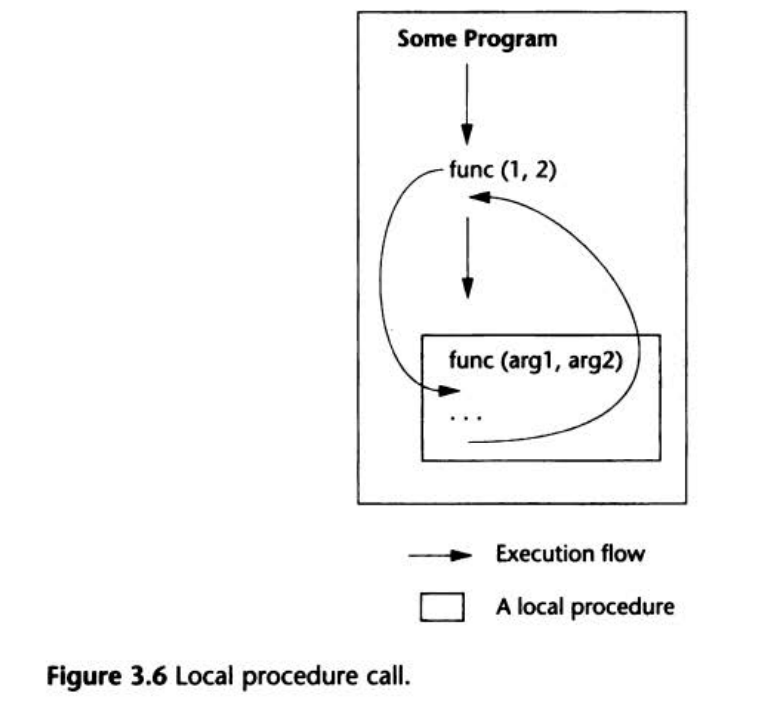

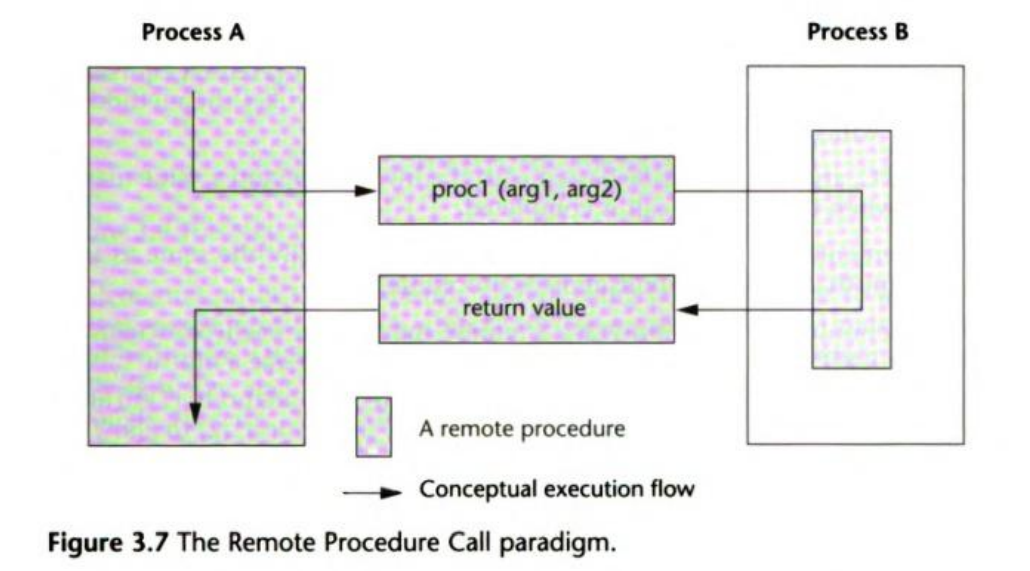

In [27]:
# Example: Online Auction System using Python's xmlrpc library

from xmlrpc.server import SimpleXMLRPCServer
from xmlrpc.client import ServerProxy
import threading
import time

# -------------------------------
# 1. Auctioneer RPC Server
# -------------------------------
class Auctioneer:
    def __init__(self):
        self.highest_bid = 0
        self.participants = []

    def register_participant(self, name):
        self.participants.append(name)
        print(f"Auctioneer: Registered participant '{name}'")
        return f"Participant {name} registered successfully"

    def submit_bid(self, name, bid):
        if bid > self.highest_bid:
            self.highest_bid = bid
            print(f"Auctioneer: New highest bid {bid} from {name}")
            return f"Bid accepted. New highest bid: {bid}"
        else:
            print(f"Auctioneer: Bid {bid} from {name} too low")
            return f"Bid too low. Current highest bid: {self.highest_bid}"

    def announce_start(self):
        print("Auctioneer: Auction started")
        return "Auction session has started"

    def announce_end(self):
        print("Auctioneer: Auction ended")
        return f"Auction session ended. Winning bid: {self.highest_bid}"

# Function to run Auctioneer RPC server
def run_auctioneer_server():
    server = SimpleXMLRPCServer(("localhost", 9000), allow_none=True, logRequests=False)
    auctioneer = Auctioneer()
    server.register_instance(auctioneer)
    print("Auctioneer RPC Server running on port 9000...")
    server.serve_forever()

# -------------------------------
# 2. Participant RPC Client
# -------------------------------
def participant_client(name, bids):
    time.sleep(1)  # Ensure server is ready
    client = ServerProxy("http://localhost:9000/", allow_none=True)

    # Register
    response = client.register_participant(name)
    print(f"{name} received: {response}")

    # Receive auction start notification
    response = client.announce_start()
    print(f"{name} received: {response}")

    # Submit bids
    for bid in bids:
        response = client.submit_bid(name, bid)
        print(f"{name} submitted bid {bid}: {response}")
        time.sleep(0.5)

    # Receive auction end notification
    response = client.announce_end()
    print(f"{name} received: {response}")

# -------------------------------
# 3. Run the RPC Auction Simulation
# -------------------------------
# Start Auctioneer server in a separate thread
server_thread = threading.Thread(target=run_auctioneer_server, daemon=True)
server_thread.start()

# Start participants
participant_threads = [
    threading.Thread(target=participant_client, args=("Participant A", [100, 150, 200])),
    threading.Thread(target=participant_client, args=("Participant B", [120, 180, 250]))
]

for t in participant_threads:
    t.start()

for t in participant_threads:
    t.join()


Exception in thread Thread-73 (run_auctioneer_server):
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipython-input-397165605.py", line 40, in run_auctioneer_server
  File "/usr/lib/python3.12/xmlrpc/server.py", line 594, in __init__
    socketserver.TCPServer.__init__(self, addr, requestHandler, bind_and_activate)
  File "/usr/lib/python3.12/socketserver.py", line 457, in __init__
    self.server_bind()
  File "/usr/lib/python3.12/socketserver.py", line 478, in server_bind
    self.socket.bind(self.server_address)
OSError: [Errno 98] Address already in use


Auctioneer: Registered participant 'Participant A'
Participant A received: Participant Participant A registered successfully
Auctioneer: Registered participant 'Participant B'
Participant B received: Participant Participant B registered successfully
Auctioneer: Auction started
Auctioneer: Auction started
Participant A received: Auction session has started
Participant B received: Auction session has started
Auctioneer: Bid 120 from Participant B too low
Participant B submitted bid 120: Bid too low. Current highest bid: 250
Auctioneer: Bid 100 from Participant A too low
Participant A submitted bid 100: Bid too low. Current highest bid: 250
Auctioneer: Bid 180 from Participant B too low
Participant B submitted bid 180: Bid too low. Current highest bid: 250
Auctioneer: Bid 150 from Participant A too low
Participant A submitted bid 150: Bid too low. Current highest bid: 250
Auctioneer: Bid 250 from Participant B too low
Participant B submitted bid 250: Bid too low. Current highest bid: 250


# 3.3.6 Distributed Objects Paradigms

## Overview
Distributed object paradigms extend object-oriented programming to networked applications. In this model, objects are distributed across multiple hosts, and applications access services by invoking methods on these remote objects.

Several paradigms implement distributed objects, including Remote Method Invocation (RMI) and Object Request Brokers (ORB).

---

## Remote Method Invocation (RMI)
- **Concept:** RMI is the object-oriented equivalent of Remote Procedure Call (RPC).  
- **Mechanism:** A process invokes a method on a remote object, passing arguments and receiving return values.  

**Auction System Example (RMI):**
- **Auctioneer object:** Provides remote methods for participant registration and bid submission.  
- **Participant objects:** Provide remote methods for:  
  - Announcing the start of the session  
  - Informing of a new highest bid  
  - Announcing the end of the session  

*Figure 3.8:* Shows how a method invocation on a remote object works.

---

## Object Request Broker (ORB) Paradigm
- **Concept:** An Object Request Broker acts as middleware between requestors and objects.  
- **Mechanism:** The ORB receives requests from a client (object requestor) and forwards them to the appropriate remote object, potentially mediating between heterogeneous objects on different platforms or APIs.  

**Auction System Example (ORB):**
- **Registration:** Each auctioneer and participant object is registered with the ORB.  
- **Session control:**  
  - Participants send registration and bid requests through the ORB.  
  - The auctioneer invokes participant methods (via the ORB) to announce session start, update bids, and announce the session end.  

*Figure 3.9:* Illustrates how ORB mediates between requestors and objects.

---

## Real-world Implementations
- **CORBA (Common Object Request Broker Architecture):** Basis for ORB paradigm. Toolkits include:  
  - Visibroker (Inprise)  
  - Java IDL  
  - Orbix (IONA)  
  - TAO (Object Computing, Inc.)  
- **Component-based technologies:**  
  - Microsoft COM/DCOM  
  - Java Beans / Enterprise Java Beans  
- **Enterprise application servers:** Provide middleware for accessing objects or components.

---

Distributed objects enable method-based remote access, providing a higher-level abstraction than RPC. Using RMI or ORBs, distributed applications like auction systems can model interactions naturally in an object-oriented style.


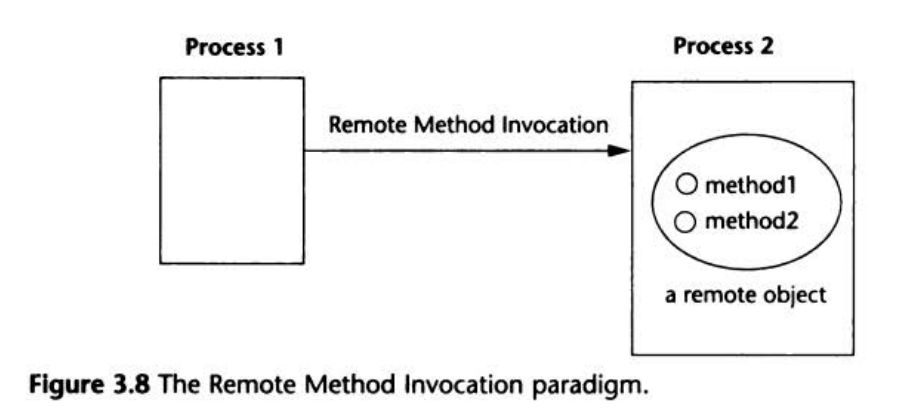

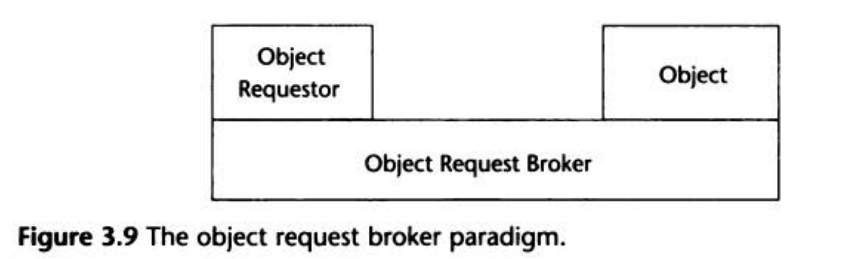

In [28]:
# Install Pyro5 via pip
!pip install Pyro5

In [29]:
# Pyro5 Distributed Objects Auction Simulation
import Pyro5.api
import Pyro5.nameserver
import threading
import time

# -------------------------------
# 1. Define Auctioneer Remote Object
# -------------------------------
@Pyro5.api.expose
class Auctioneer:
    def __init__(self):
        self.highest_bid = 0
        self.participants = []

    def register_participant(self, name):
        self.participants.append(name)
        print(f"Auctioneer: Registered participant '{name}'")
        return f"Participant {name} registered successfully"

    def submit_bid(self, name, bid):
        if bid > self.highest_bid:
            self.highest_bid = bid
            print(f"Auctioneer: New highest bid {bid} from {name}")
            return f"Bid accepted. New highest bid: {bid}"
        else:
            print(f"Auctioneer: Bid {bid} from {name} too low")
            return f"Bid too low. Current highest bid: {self.highest_bid}"

    def announce_start(self):
        print("Auctioneer: Auction started")
        return "Auction session has started"

    def announce_end(self):
        print("Auctioneer: Auction ended")
        return f"Auction session ended. Winning bid: {self.highest_bid}"

# -------------------------------
# 2. Start Pyro5 Name Server Programmatically
# -------------------------------
def start_nameserver():
    Pyro5.nameserver.start_ns_loop(host="localhost", port=9090)

ns_thread = threading.Thread(target=start_nameserver, daemon=True)
ns_thread.start()
time.sleep(1)  # Ensure Name Server is up

# -------------------------------
# 3. Run Auctioneer Daemon
# -------------------------------
def run_auctioneer():
    daemon = Pyro5.api.Daemon(host="localhost")
    auctioneer = Auctioneer()
    uri = daemon.register(auctioneer, "Auctioneer")      # Register remote object
    ns = Pyro5.api.locate_ns()                           # Locate Name Server
    ns.register("example.auction", uri)                 # Register object with Name Server
    print(f"Auctioneer registered with URI: {uri}")
    daemon.requestLoop()  # Wait for remote calls

auctioneer_thread = threading.Thread(target=run_auctioneer, daemon=True)
auctioneer_thread.start()
time.sleep(1)  # Give Auctioneer time to register

# -------------------------------
# 4. Participant Client
# -------------------------------
def participant_client(name, bids):
    auctioneer = Pyro5.api.Proxy("PYRONAME:example.auction")

    # Register participant
    response = auctioneer.register_participant(name)
    print(f"{name} received: {response}")

    # Auction start
    response = auctioneer.announce_start()
    print(f"{name} received: {response}")

    # Submit bids
    for bid in bids:
        response = auctioneer.submit_bid(name, bid)
        print(f"{name} submitted bid {bid}: {response}")
        time.sleep(0.5)

    # Auction end
    response = auctioneer.announce_end()
    print(f"{name} received: {response}")

# -------------------------------
# 5. Run Participants
# -------------------------------
participant_threads = [
    threading.Thread(target=participant_client, args=("Participant A", [100, 150, 200])),
    threading.Thread(target=participant_client, args=("Participant B", [120, 180, 250]))
]

for t in participant_threads:
    t.start()
for t in participant_threads:
    t.join()


Exception in thread Thread-76 (start_nameserver):
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipython-input-3648100308.py", line 42, in start_nameserver
  File "/usr/local/lib/python3.12/dist-packages/Pyro5/nameserver.py", line 650, in start_ns_loop
    daemon = NameServerDaemon(host, port, unixsocket, nathost=nathost, natport=natport, storage=storage)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/Pyro5/nameserver.py", line 464, in __init__
    super(NameServerDaemon, self).__init__(host, port, unixsocket, nathost=nathost, natport=natport)
  File "/usr/local/lib/python3.12/dist-packages/Pyro5/server.py", line 237, in __init__
    self.transportServer.init(self, host, port, unixsocket)

Auctioneer registered with URI: PYRO:Auctioneer@localhost:36075
Auctioneer: Registered participant 'Participant A'
Participant A received: Participant Participant A registered successfully
Auctioneer: Auction started
Participant A received: Auction session has started
Auctioneer: New highest bid 100 from Participant A
Participant A submitted bid 100: Bid accepted. New highest bid: 100
Auctioneer: Registered participant 'Participant B'
Participant B received: Participant Participant B registered successfully
Auctioneer: Auction started
Participant B received: Auction session has started
Auctioneer: New highest bid 120 from Participant B
Participant B submitted bid 120: Bid accepted. New highest bid: 120
Auctioneer: New highest bid 150 from Participant A
Participant A submitted bid 150: Bid accepted. New highest bid: 150
Auctioneer: New highest bid 180 from Participant B
Participant B submitted bid 180: Bid accepted. New highest bid: 180
Auctioneer: New highest bid 200 from Participant A

# 3.3.7 Object Space Paradigm

## Overview
The object space paradigm is the most abstract object-oriented paradigm.  
It introduces logical entities called **object spaces**, which serve as virtual meeting rooms for participants in a distributed application.  
Providers place objects into the space, while requestors access these objects.  

*Figure 3.10:* Shows how providers and requestors interact through an object space.

---

## Key Features
- **Virtual shared space:**  
  - Participants interact indirectly via objects in the space.  
  - Acts as a meeting room for network resources.  

- **Decoupling:**  
  - Hides complexities of object lookup required in paradigms like RMI or ORB.  

- **Mutual exclusion:**  
  - Objects in the space can be retrieved by only one participant at a time, preventing conflicts.  

---

## Auction System Example (Object Space)
- **Registration:**  
  - All participants and the auctioneer subscribe to a common object space.  
  - Each participant deposits an object into the space to register for the session.  

- **Auction Start:**  
  - The auctioneer deposits an object containing item information and bid history.  

- **Placing Bids:**  
  - Participants retrieve the object, update bids, and return it to the space.  

- **Session End:**  
  - Auctioneer retrieves the object to determine the highest bidder and announce the result.  

---

## Toolkit Example
- **JavaSpaces** ([java.sun.com](https://java.sun.com)) provides a concrete implementation of the object space paradigm.

---
The object space paradigm provides a highly abstract, shared-space model that simplifies distributed programming by decoupling participants and ensuring mutual exclusion. It is particularly suited for collaborative and resource-sharing applications.


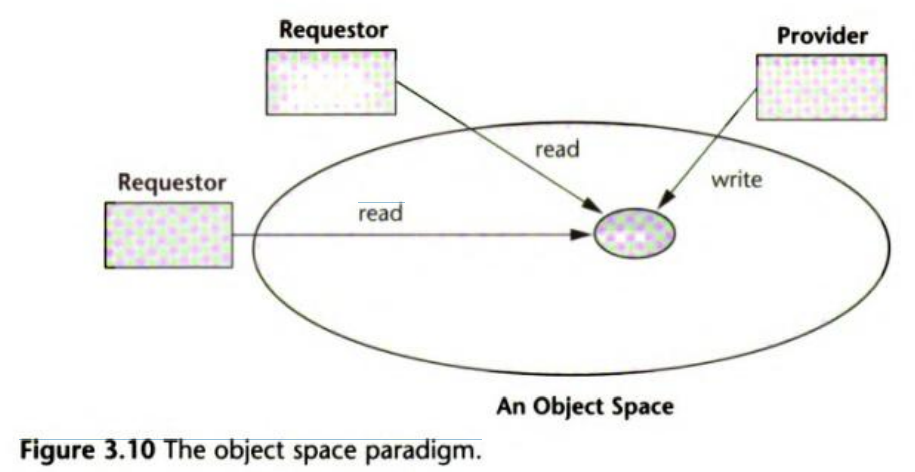

In [30]:
# Object Space Paradigm Auction Simulation
import threading
import time

# -------------------------------
class ObjectSpace:
    def __init__(self):
        self.space = {}
        self.lock = threading.Lock()

    def put(self, key, obj):
        with self.lock:
            if key not in self.space:
                self.space[key] = []
            if isinstance(obj, list):
                self.space[key].extend(obj)
            else:
                self.space[key].append(obj)
            print(f"ObjectSpace: Object '{key}' deposited")

    def get(self, key):
        with self.lock:
            if key in self.space and self.space[key]:
                obj = self.space[key].pop(0)
                print(f"ObjectSpace: Object '{key}' retrieved")
                return obj
            return None

    def read(self, key):
        with self.lock:
            return list(self.space.get(key, []))

# -------------------------------
def auctioneer(space):
    # Wait for participants to register
    timeout = 5
    start_time = time.time()
    while True:
        participants = space.read("participant")
        if len(participants) >= 2:
            break
        if time.time() - start_time > timeout:
            print("Auctioneer: Timeout waiting for participants")
            return
        time.sleep(0.1)

    # Deposit auction object
    auction_object = {"item": "Antique Vase", "bids": {}}
    space.put("auction", auction_object)
    print("Auctioneer: Auction started")

    # Wait for participants to place bids
    time.sleep(3)

    # Retrieve updated auction object
    final_auction = space.get("auction")
    highest_bid = 0
    winner = None
    for name, bid in final_auction["bids"].items():
        if bid > highest_bid:
            highest_bid = bid
            winner = name
    print(f"Auctioneer: Auction ended. Winner: {winner} with bid {highest_bid}")

# -------------------------------
def participant(space, name, bid_amounts):
    space.put("participant", name)
    print(f"{name}: Registered in object space")

    # Wait for auction object
    while True:
        auction_object = space.get("auction")
        if auction_object:
            break
        time.sleep(0.1)

    for bid in bid_amounts:
        auction_object["bids"][name] = bid
        print(f"{name}: Placed bid {bid}")
        time.sleep(0.5)

    space.put("auction", auction_object)

# -------------------------------
space = ObjectSpace()

auctioneer_thread = threading.Thread(target=auctioneer, args=(space,))
participant_threads = [
    threading.Thread(target=participant, args=(space, "Participant A", [100, 150, 200])),
    threading.Thread(target=participant, args=(space, "Participant B", [120, 180, 250]))
]

auctioneer_thread.start()
for t in participant_threads:
    t.start()
for t in participant_threads:
    t.join()
auctioneer_thread.join()


ObjectSpace: Object 'participant' deposited
Participant A: Registered in object space
ObjectSpace: Object 'participant' deposited
Participant B: Registered in object space
ObjectSpace: Object 'auction' deposited
Auctioneer: Auction started
ObjectSpace: Object 'auction' retrieved
Participant A: Placed bid 100
Participant A: Placed bid 150
Participant A: Placed bid 200
ObjectSpace: Object 'auction' deposited
ObjectSpace: Object 'auction' retrieved
Participant B: Placed bid 120
Participant B: Placed bid 180
Participant B: Placed bid 250


Exception in thread Thread-84 (auctioneer):
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipython-input-2561469297.py", line 59, in auctioneer
TypeError: 'NoneType' object is not subscriptable


ObjectSpace: Object 'auction' deposited


# 3.3.8 Mobile Agent Paradigm

## Overview
A **mobile agent** is a transportable program or object that can move autonomously between hosts.  
Each agent carries its own itinerary and performs tasks at each host it visits.  
This paradigm offers an abstraction where data is transported by the program/object itself, instead of sending messages between hosts.

*Figure 3.11:* Shows a mobile agent traveling across multiple hosts.

---

## Key Features
- **Autonomous travel:**  
  - The agent moves independently from host to host.  
  - Executes tasks at each stop as per its itinerary.  

- **Data transport:**  
  - Information is carried within the agent, reducing the need for multiple message exchanges.  

- **Task execution:**  
  - Each host executes the operations the agent is programmed to perform.  

---

## Auction System Example (Mobile Agent)
- **Participant Registration:**  
  - Each participant launches a mobile agent to the auctioneer with their identity and network address.  

- **Auction Session:**  
  - Auctioneer launches a mobile agent carrying:  
    - Current highest bid  
    - Itinerary of participants  

- **Bid Updates:**  
  - The mobile agent circulates among participants, updating bids in real-time.  

- **Auction Conclusion:**  
  - The auctioneer launches the agent for a final round to announce the outcome to all participants.  

---

## Toolkits and Systems
- **Commercial:**  
  - Concordia system ([meitca.com](http://meitca.com))  
  - Aglet system ([trl.ibm.co.jp](http://trl.ibm.co.jp))  

- **Research:**  
  - D’Agent ([agent.cs.dartmouth.edu](http://agent.cs.dartmouth.edu))  
  - Tacoma Project ([tacoma.cs.uit.no](http://tacoma.cs.uit.no))  

---

The mobile agent paradigm provides a dynamic, autonomous model for distributed applications, reducing network message overhead by transporting computation along with data. It is well-suited for applications like distributed auctions, network management, and automated resource monitoring.


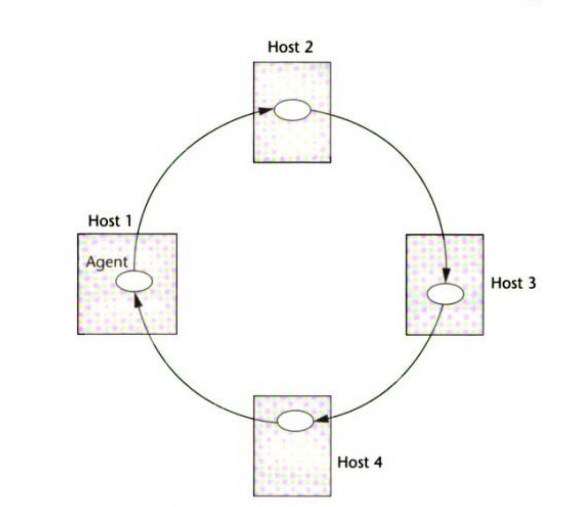

In [31]:
#  Mobile Agent Paradigm Auction Simulation
# Simulating autonomous agents moving among hosts

import threading
import time

# -------------------------------
# 1. Define Mobile Agent
# -------------------------------
class MobileAgent:
    def __init__(self, itinerary, auction_data):
        self.itinerary = itinerary  # List of participants to visit
        self.auction_data = auction_data  # Contains current highest bid
        self.history = []

    def travel_and_execute(self):
        for participant in self.itinerary:
            # Simulate agent visiting a host
            print(f"Agent visiting {participant['name']}")
            self.execute_task(participant)
            time.sleep(0.5)  # Simulate travel delay

    def execute_task(self, participant):
        # Update bid if participant wants to bid higher
        bid = participant.get("bid", 0)
        if bid > self.auction_data["highest_bid"]:
            self.auction_data["highest_bid"] = bid
            self.auction_data["highest_bidder"] = participant["name"]
            print(f"Agent updated highest bid to {bid} by {participant['name']}")
        self.history.append((participant["name"], bid))

# -------------------------------
# 2. Participants and Auctioneer Data
# -------------------------------
participants = [
    {"name": "Participant A", "bid": 200},
    {"name": "Participant B", "bid": 250},
]

auction_data = {
    "item": "Rare Painting",
    "highest_bid": 0,
    "highest_bidder": None
}

# -------------------------------
# 3. Auctioneer launches Mobile Agent
# -------------------------------
def auctioneer_launch_agent():
    agent = MobileAgent(itinerary=participants, auction_data=auction_data)
    agent.travel_and_execute()
    print(f"Auctioneer: Auction ended. Winner: {auction_data['highest_bidder']} with bid {auction_data['highest_bid']}")
    print("Agent travel history:", agent.history)

# -------------------------------
# 4. Run Mobile Agent Auction Simulation
# -------------------------------
auctioneer_thread = threading.Thread(target=auctioneer_launch_agent)
auctioneer_thread.start()
auctioneer_thread.join()


Agent visiting Participant A
Agent updated highest bid to 200 by Participant A
Agent visiting Participant B
Agent updated highest bid to 250 by Participant B
Auctioneer: Auction ended. Winner: Participant B with bid 250
Agent travel history: [('Participant A', 200), ('Participant B', 250)]


# 3.3.9 Network Services Paradigm

## Overview
In this paradigm, service providers register with **directory servers** on a network.  
A process that needs a service queries the directory server at runtime to locate the service.  
Once found, the process interacts with the service using the provided reference.

*Figure 3.12:* Illustrates service registration and lookup via a directory server.

---

## Key Features
- **Extension of RMI Paradigm:**  
  - Similar to Remote Method Invocation (RMI).  
  - Difference: Services are registered in a global directory, allowing discovery across a federated network.  

- **Location Transparency:**  
  - Services can be accessed without knowing their physical location.  
  - Provides extra abstraction for developers.  

- **Callback Methods:**  
  - Service requestors can provide callbacks, enabling service providers to initiate communication.  
  - Used for notifications like session start, end, or status updates.  

---

## Auction System Example (Network Services)
- **Auctioneer Registration:**  
  - Auctioneer registers itself with the directory service.  

- **Participant Lookup:**  
  - Participants query the directory service to locate the auctioneer and join the session.  

- **Bid Handling:**  
  - Participants submit bids using references obtained from the directory.  
  - Auctioneer uses callback methods to notify participants of session events and updates.  

---

## Toolkits and Systems
- **Java Jini** ([jini.org](http://jini.org)) – provides discovery and registration services.  
- **SOAP (Simple Object Access Protocol)** – applies this paradigm for Web-accessible services.


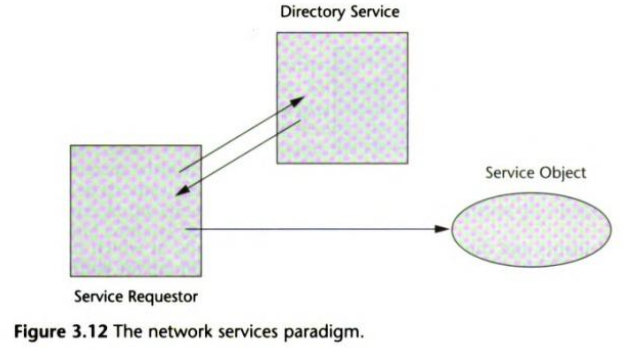

In [32]:
# Network Services Paradigm Auction Simulation
import threading
import time

# -------------------------------
# 1. Define Directory Service
# -------------------------------
class DirectoryService:
    def __init__(self):
        self.services = {}
        self.lock = threading.Lock()

    def register_service(self, name, reference):
        with self.lock:
            self.services[name] = reference
            print(f"DirectoryService: Service '{name}' registered")

    def lookup_service(self, name):
        with self.lock:
            return self.services.get(name, None)

# -------------------------------
# 2. Define Auctioneer (Service Provider)
# -------------------------------
class Auctioneer:
    def __init__(self):
        self.highest_bid = 0
        self.highest_bidder = None
        self.callbacks = []

    def register_callback(self, callback):
        self.callbacks.append(callback)

    def submit_bid(self, participant_name, bid):
        if bid > self.highest_bid:
            self.highest_bid = bid
            self.highest_bidder = participant_name
            self.notify_all(f"New highest bid {bid} by {participant_name}")
            return f"Bid accepted: {bid}"
        else:
            return f"Bid too low. Current highest bid: {self.highest_bid}"

    def notify_all(self, message):
        for callback in self.callbacks:
            callback(message)

    def start_auction(self):
        self.notify_all("Auction started")

    def end_auction(self):
        self.notify_all(f"Auction ended. Winner: {self.highest_bidder} with bid {self.highest_bid}")

# -------------------------------
# 3. Define Participant (Service Requestor)
# -------------------------------
def participant(directory, name, bids):
    # Lookup Auctioneer service
    auctioneer = directory.lookup_service("auctioneer")
    if not auctioneer:
        print(f"{name}: Auctioneer service not found")
        return

    # Define callback
    def event_callback(message):
        print(f"{name} received: {message}")

    # Register callback
    auctioneer.register_callback(event_callback)

    # Place bids
    for bid in bids:
        response = auctioneer.submit_bid(name, bid)
        print(f"{name} submitted bid {bid}: {response}")
        time.sleep(0.5)

# -------------------------------
# 4. Run Network Services Auction Simulation
# -------------------------------
directory = DirectoryService()
auctioneer = Auctioneer()

# Register Auctioneer in Directory Service
directory.register_service("auctioneer", auctioneer)

# Start auction (notify participants)
auctioneer.start_auction()

# Create participant threads
participant_threads = [
    threading.Thread(target=participant, args=(directory, "Participant A", [100, 150, 200])),
    threading.Thread(target=participant, args=(directory, "Participant B", [120, 180, 250]))
]

# Start participants
for t in participant_threads:
    t.start()

# Join participants
for t in participant_threads:
    t.join()

# End auction
auctioneer.end_auction()


DirectoryService: Service 'auctioneer' registered
Participant A received: New highest bid 100 by Participant A
Participant A submitted bid 100: Bid accepted: 100
Participant A received: New highest bid 120 by Participant B
Participant B received: New highest bid 120 by Participant B
Participant B submitted bid 120: Bid accepted: 120
Participant A received: New highest bid 150 by Participant AParticipant A received: New highest bid 180 by Participant B
Participant B received: New highest bid 180 by Participant B
Participant B submitted bid 180: Bid accepted: 180

Participant B received: New highest bid 150 by Participant A
Participant A submitted bid 150: Bid accepted: 150
Participant A received: New highest bid 250 by Participant B
Participant B received: New highest bid 250 by Participant B
Participant B submitted bid 250: Bid accepted: 250
Participant A submitted bid 200: Bid too low. Current highest bid: 250
Participant A received: Auction ended. Winner: Participant B with bid 250
P

# 3.3.10 Collaborative Application (Groupware) Paradigm

## Overview
Designed for **computer-supported cooperative work (CSCW)**.  
Processes participate in a collaborative session as a group, with each participant able to contribute input to all or part of the group.

Two main mechanisms:
- **Message-based groupware** – multicasting messages to the group.  
- **Whiteboard-based groupware** – using a shared virtual display for reading and writing data.

*Figure 3.13:* Illustrates the two categories of the groupware paradigm.

---

## Auction System Example (Groupware)

### Message-based Approach
- Auctioneer initiates a group for all participants.  
- Auctioneer multicasts a start-of-session message.  
- Each bid is multicast to all participants for independent status updates.  
- Auctioneer multicasts the end-of-session message announcing the outcome.  

### Whiteboard-based Approach
- Auctioneer and participants share a virtual whiteboard.  
- Auctioneer writes the start announcement.  
- Participants place bids by writing to the whiteboard.  
- Auctioneer concludes by writing the final announcement.  

---

## Key Features
- Supports **real-time collaboration** and **group awareness**.  
- Can be **message-driven** or **shared-object-driven** (whiteboard).  
- Suitable for applications where multiple participants need **simultaneous access** to shared information.  

---

## Examples and Toolkits
- **Message-based groupware:** Java Multicast API, Java Shared Data Toolkit (JSDT)  
- **Whiteboard-based groupware:** SMART Board, NetMeeting, Groove  
- **Commercial systems:** Lotus QuickPlace  
- **Protocols:** Notification Service Transfer Protocol (NSTP) – synchronous groupware infrastructure  

---
The groupware paradigm enables **collaborative, real-time interaction** among participants, making it ideal for distributed auctions, collaborative editing, and video conferencing applications.


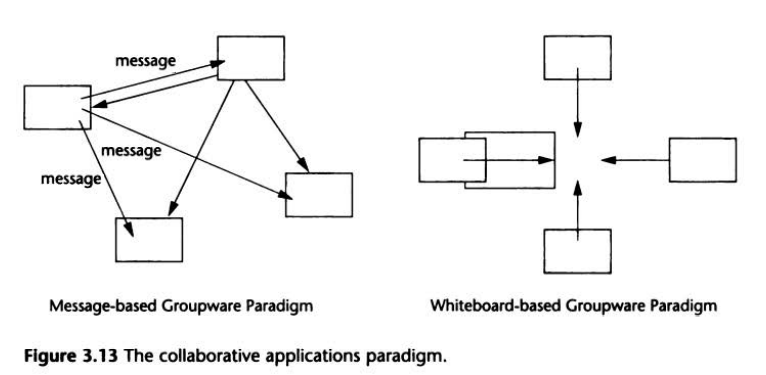

In [33]:
# Collaborative Groupware Auction Simulation
import threading
import time

# -------------------------------
# 1. Shared Whiteboard
# -------------------------------
class Whiteboard:
    def __init__(self):
        self.lock = threading.Lock()
        self.board = []

    def write(self, message):
        with self.lock:
            self.board.append(message)
            print(f"Whiteboard update: {message}")

    def read_all(self):
        with self.lock:
            return list(self.board)

# -------------------------------
# 2. Auctioneer Behavior
# -------------------------------
def auctioneer(whiteboard, participants_bids):
    # Start auction
    whiteboard.write("Auctioneer: Auction started")

    # Multicast bids in real-time
    max_rounds = max(len(b) for b in participants_bids.values())
    for i in range(max_rounds):
        for participant, bids in participants_bids.items():
            if i < len(bids):
                bid = bids[i]
                whiteboard.write(f"{participant} places bid: {bid}")
        time.sleep(0.5)

    # Determine winner
    final_bids = {p: bids[-1] for p, bids in participants_bids.items()}
    winner = max(final_bids, key=final_bids.get)
    highest_bid = final_bids[winner]
    whiteboard.write(f"Auctioneer: Auction ended. Winner: {winner} with bid {highest_bid}")

# -------------------------------
# 3. Participant Behavior
# -------------------------------
def participant_listener(whiteboard, name):
    last_seen = 0
    while True:
        board = whiteboard.read_all()
        new_messages = board[last_seen:]
        for msg in new_messages:
            print(f"{name} sees: {msg}")
        last_seen = len(board)
        if any("Auction ended" in msg for msg in new_messages):
            break
        time.sleep(0.2)

# -------------------------------
# 4. Run Groupware Auction Simulation
# -------------------------------
whiteboard = Whiteboard()

participants_bids = {
    "Participant A": [100, 150, 200],
    "Participant B": [120, 180, 250]
}

# Start participant listeners
listener_threads = []
for participant in participants_bids.keys():
    t = threading.Thread(target=participant_listener, args=(whiteboard, participant))
    t.start()
    listener_threads.append(t)

# Start auctioneer
auctioneer_thread = threading.Thread(target=auctioneer, args=(whiteboard, participants_bids))
auctioneer_thread.start()

# Join threads
auctioneer_thread.join()
for t in listener_threads:
    t.join()


Whiteboard update: Auctioneer: Auction started
Whiteboard update: Participant A places bid: 100
Whiteboard update: Participant B places bid: 120
Participant B sees: Auctioneer: Auction started
Participant B sees: Participant A places bid: 100
Participant B sees: Participant B places bid: 120
Participant A sees: Auctioneer: Auction started
Participant A sees: Participant A places bid: 100
Participant A sees: Participant B places bid: 120
Whiteboard update: Participant A places bid: 150
Whiteboard update: Participant B places bid: 180
Participant A sees: Participant A places bid: 150
Participant A sees: Participant B places bid: 180
Participant B sees: Participant A places bid: 150
Participant B sees: Participant B places bid: 180
Whiteboard update: Participant A places bid: 200
Whiteboard update: Participant B places bid: 250
Participant A sees: Participant A places bid: 200
Participant A sees: Participant B places bid: 250
Participant B sees: Participant A places bid: 200
Participant B

# 3.4 Trade-offs in Distributed Computing Paradigms

When designing a distributed application, developers can choose from multiple paradigms. Each paradigm offers advantages, but also comes with trade-offs that must be carefully considered.

---

## 3.4.1 Level of Abstraction vs. Overhead

**Observation:**  
Paradigms vary in abstraction level (*Figure 3.14*):

| Level of Abstraction | Paradigms |
|--------------------|-----------|
| High               | Object space, collaborative applications |
| Medium-High        | Network services, object request broker, message system, mobile agent |
| Medium             | Remote procedure call, remote method invocation |
| Low                | Client-server, peer-to-peer |
| Lowest             | Message passing |

- **High-abstraction paradigms** (e.g., Object Spaces, Collaborative Applications) simplify development but add runtime overhead.  
  - *Example:* Remote Method Invocation (RMI) uses stubs and skeletons to hide network communication details.  
  - **Pros:** Faster development, easier to understand.  
  - **Cons:** Requires more system resources and longer execution time.  

- **Low-abstraction paradigms** (e.g., socket API) are efficient but require manual handling of communication details.  

**Key Point:** Choose high-abstraction tools for rapid development; choose low-abstraction tools for performance-critical applications.

---

## 3.4.2 Scalability

- Complexity grows with the number of participants in a distributed application.  
- *Example:* In an auction system, the auctioneer must manage participants’ addresses and send updates.  

- **Message-passing implementation:** Developer manages all communication manually.  
- **High-level paradigms** (Object Spaces, Publish/Subscribe): System handles participant management automatically.  
- **Mobile Agent paradigm:** Handles large-scale participants efficiently by distributing computation.  

**Key Point:** High-level paradigms and mobile agents scale better than low-level paradigms.

---

## 3.4.3 Cross-Platform Support

- Paradigms themselves are **platform-independent**.  
- Toolkits may be **platform-dependent**.  

| Toolkit | Platform Support |
|---------|----------------|
| Java RMI, JavaSpaces | Only work on Java Virtual Machines → all participants must be in Java |
| COM/DCOM | Microsoft platforms only |
| CORBA | Designed for cross-platform support; allows multiple languages and heterogeneous systems |

**Key Point:** Choose toolkits according to platform requirements and heterogeneity of the system.

---

## 3.4.4 Additional Software-Engineering Considerations

When selecting a paradigm or toolkit, also consider:
- Maturity and stability of the toolkit  
- Fault tolerance provided by the toolkit  
- Availability of development tools (debuggers, monitoring tools, etc.)  
- Maintainability of code  
- Code reuse potential  

---
Selecting a distributed computing paradigm involves balancing **abstraction, performance, scalability, and platform requirements**.  
High-abstraction tools simplify development but may introduce overhead, while low-level paradigms offer efficiency at the cost of development complexity.


In [34]:
# Trade-offs in Distributed Computing Paradigms Simulation
import threading
import time
import random

# -------------------------------
# 1. Simulate a Low-Abstraction Paradigm: Message Passing
# -------------------------------
def message_passing_auction(participants_count=5):
    start_time = time.time()
    # Simulate sending bids manually
    highest_bid = 0
    highest_bidder = None
    for i in range(participants_count):
        for _ in range(3):  # 3 bids per participant
            bid = random.randint(100, 500)
            if bid > highest_bid:
                highest_bid = bid
                highest_bidder = f"Participant {i+1}"
    duration = time.time() - start_time
    return duration, highest_bidder, highest_bid

# -------------------------------
# 2. Simulate a High-Abstraction Paradigm: Object Space
# -------------------------------
class ObjectSpaceSim:
    def __init__(self):
        self.lock = threading.Lock()
        self.auction = {}

    def place_bid(self, participant, bid):
        with self.lock:
            self.auction[participant] = bid
            time.sleep(0.01)  # Simulate abstraction overhead

def object_space_auction(participants_count=5):
    start_time = time.time()
    space = ObjectSpaceSim()
    threads = []

    def participant_thread(pid):
        for _ in range(3):
            bid = random.randint(100, 500)
            space.place_bid(f"Participant {pid+1}", bid)

    for i in range(participants_count):
        t = threading.Thread(target=participant_thread, args=(i,))
        threads.append(t)
        t.start()

    for t in threads:
        t.join()

    # Determine winner
    highest_bidder = max(space.auction, key=space.auction.get)
    highest_bid = space.auction[highest_bidder]
    duration = time.time() - start_time
    return duration, highest_bidder, highest_bid

# -------------------------------
# 3. Run Comparative Simulation
# -------------------------------
participants_count = 10

low_abs_time, low_winner, low_bid = message_passing_auction(participants_count)
high_abs_time, high_winner, high_bid = object_space_auction(participants_count)

print("Trade-off Simulation Results:")
print(f"Low-Abstraction (Message Passing): Duration={low_abs_time:.4f}s, Winner={low_winner}, Bid={low_bid}")
print(f"High-Abstraction (Object Space): Duration={high_abs_time:.4f}s, Winner={high_winner}, Bid={high_bid}")
print("\nObservation:")
print("- High-abstraction paradigm takes longer due to synchronization and overhead.")
print("- Low-abstraction is faster but requires manual handling of communication and bidding logic.")


Trade-off Simulation Results:
Low-Abstraction (Message Passing): Duration=0.0001s, Winner=Participant 4, Bid=498
High-Abstraction (Object Space): Duration=0.3204s, Winner=Participant 6, Bid=397

Observation:
- High-abstraction paradigm takes longer due to synchronization and overhead.
- Low-abstraction is faster but requires manual handling of communication and bidding logic.


# 3.5 Summary

This note examined a wide range of paradigms for distributed applications, highlighting their **abstraction levels, purposes, and trade-offs**.

---

## Paradigms Covered
- Message Passing  
- Client-Server  
- Peer-to-Peer  
- Message System  
  - Point-to-Point  
  - Publish/Subscribe  
- Remote Procedure Call (RPC)  
- Distributed Objects  
  - Remote Method Invocation (RMI)  
  - Object Request Broker (ORB)  
- Object Space  
- Mobile Agents  
- Network Services  
- Collaborative Applications (Groupware)  

---

## Key Takeaways
- These paradigms provide **varying levels of abstraction**, which help hide the complexity of interprocess communication and event synchronization.  
- **Abstraction** allows developers to focus on the overall application logic rather than low-level details.  

**When choosing a paradigm or toolkit, consider trade-offs:**
- **Overhead:** Higher abstraction often increases runtime cost.  
- **Scalability:** Some paradigms handle more participants or objects efficiently.  
- **Cross-platform support:** Some tools are platform- or language-specific.  
- **Software engineering considerations:** Maturity, fault tolerance, maintainability, and code reuse.

---

Selecting the right paradigm involves balancing **development efficiency, performance, scalability, and platform requirements**, depending on the specific needs of the distributed application.
